In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
DATA = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

# 실습용 데이터

> ## 1) 데이터 분석

In [22]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [23]:
DATA.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


> ## 2) 데이터 시각화

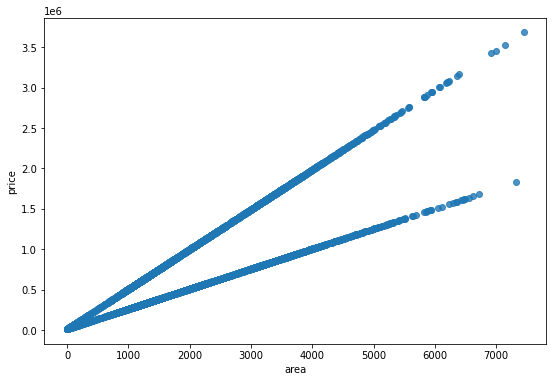

In [24]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'area', y = 'price', data = DATA, fit_reg = False)
plt.show()

# 인코딩

> ## 1) Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DATA['neighborhood'] = encoder1.fit_transform(DATA[['neighborhood']]) # 정보 넘길 때 DATA.~ 말고 DATA[['~]]로 넘기기

In [39]:
encoder2 = LabelEncoder()
DATA['style'] = encoder2.fit_transform(DATA[['style']])

> ## Encoding DATA 확인

In [40]:
DATA.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,1,1188,3,2,1,598291
1,491,1,3512,5,3,2,1744259
2,5952,1,1134,3,2,1,571669
3,3525,0,1940,4,2,1,493675
4,5108,1,2208,6,4,2,1101539


# 단일 회귀

## Data Split(X : area)

In [51]:
from sklearn.model_selection import train_test_split

X = DATA[['area']]
y = DATA['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [52]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


## 단일 회귀 Modeling

- 모델 생성

In [53]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- R-Square

In [54]:
RA.score(X_test, y_test)

0.6784229855524156

- MSE

In [55]:
from sklearn.metrics import mean_squared_error

y_hat_RA = RA.predict(X_test)

mean_squared_error(y_test, y_hat_RA)

88607832178.18301

# 다항 회귀(2차)

- 모델 생성

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터 : ', X_train.shape)
print('변환 후 데이터 : ', X_train_poly.shape)

변환 전 데이터 :  (4219, 1)
변환 후 데이터 :  (4219, 2)


In [57]:
from sklearn.linear_model import LinearRegression

NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-  R_Square

In [58]:
X_test_poly = poly.fit_transform(X_test)

NL.score(X_test_poly, y_test)

0.6778047487989153

- MSE

In [59]:
from sklearn.metrics import mean_squared_error

X_test_poly = poly.fit_transform(X_test)

y_hat_NL = NL.predict(X_test_poly)

mean_squared_error(y_test, y_hat_NL)

88778182097.60945

# 다중 회귀

## 1) Data Split(X : area, bedrooms, bathrooms, style, neighborhood)

In [69]:
from sklearn.model_selection import train_test_split

X = DATA[['area', 'bedrooms', 'bathrooms', 'style', 'neighborhood']]
y = DATA['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

In [70]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 5) (4219,)
Test Data :  (1809, 5) (1809,)


## 2) 다중 회귀 Modeling

- 모델 생성

In [71]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- R-Square

In [72]:
MR.score(X_test, y_test)

0.6782871074594331

- MSE

In [73]:
from sklearn.metrics import mean_squared_error

y_hat_MR = MR.predict(X_test)

mean_squared_error(y_test, y_hat_MR)

88645272239.87517

# Scailing

- Scailing

In [101]:
X = DATA[['area', 'bedrooms', 'bathrooms', 'style', 'neighborhood']]
y = DATA['price']

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_Norm = scaler.fit_transform(X)

In [103]:
X_Norm[0:5]

array([[0.15952733, 0.375     , 0.4       , 0.5       , 0.5       ],
       [0.4715993 , 0.625     , 0.6       , 1.        , 0.5       ],
       [0.15227608, 0.375     , 0.4       , 0.5       , 0.5       ],
       [0.26050759, 0.5       , 0.4       , 0.5       , 0.        ],
       [0.29649523, 0.75      , 0.8       , 1.        , 0.5       ]])

- Scailing 후 X_Norm Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y, test_size = 0.3, random_state = 2045)

In [105]:
from sklearn.linear_model import LinearRegression

MR_Norm = LinearRegression()
MR_Norm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Scailing 후 R-Square

In [106]:
MR_Norm.score(X_test, y_test)

0.6782871074594331

- Scailing 후 MSE

In [107]:
from sklearn.metrics import mean_squared_error

y_hat_MR_Norm = MR_Norm.predict(X_test)

mean_squared_error(y_test, y_hat_MR_Norm)

88645272239.87517

# 최종 비교

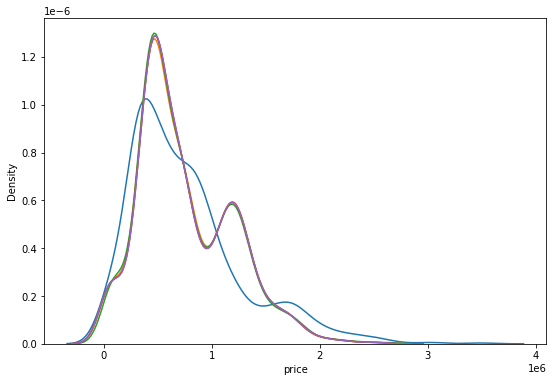

In [108]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat_RA, hist = False, label = 'y_hat_RA', ax = ax1)
ax3 = sns.distplot(y_hat_NL, hist = False, label = 'y_hat_NL', ax = ax1)
ax4 = sns.distplot(y_hat_MR, hist = False, label = 'y_hat_MR', ax = ax1)
ax5 = sns.distplot(y_hat_MR_Norm, hist = False, label = 'y_hat_MR_Norm', ax = ax1)
plt.show()